# Tải các thư viện, dataset cần thiết:

In [1]:
!git clone https://github.com/wbailer/few-shot-object-detection|/

/bin/bash: line 1: /: Is a directory
Cloning into 'few-shot-object-detection'...
remote: Enumerating objects: 1199, done.
remote: Counting objects: 100% (372/372), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 1199 (delta 270), reused 265 (delta 265), pack-reused 827 (from 3)
Receiving objects: 100% (1199/1199), 653.08 KiB | 11.26 MiB/s, done.
Resolving deltas: 100% (714/714), done.


In [2]:

!wget ./datasets/cocosplit/datasplit http://dl.yf.io/fs-det/datasets/cocosplit/datasplit/5k.json
!wget ./datasets/cocosplit/datasplit http://dl.yf.io/fs-det/datasets/cocosplit/datasplit/trainvalno5k.json

--2025-08-26 06:20:17--  http://./datasets/cocosplit/datasplit
Resolving . (.)... failed: No address associated with hostname.
wget: unable to resolve host address ‘.’
--2025-08-26 06:20:17--  http://dl.yf.io/fs-det/datasets/cocosplit/datasplit/5k.json
Resolving dl.yf.io (dl.yf.io)... 128.32.162.150
Connecting to dl.yf.io (dl.yf.io)|128.32.162.150|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22135600 (21M) [application/json]
Saving to: ‘5k.json’

5k.json             100%[===================>]  21.11M  7.26MB/s    in 2.9s    

2025-08-26 06:20:20 (7.26 MB/s) - ‘5k.json’ saved [22135600/22135600]

FINISHED --2025-08-26 06:20:20--
Total wall clock time: 3.3s
Downloaded: 1 files, 21M in 2.9s (7.26 MB/s)
--2025-08-26 06:20:20--  http://./datasets/cocosplit/datasplit
Resolving . (.)... failed: No address associated with hostname.
wget: unable to resolve host address ‘.’
--2025-08-26 06:20:20--  http://dl.yf.io/fs-det/datasets/cocosplit/datasplit/trainvalno5k.json


In [3]:
!mkdir -p ./few-shot-object-detection/datasets/cocosplit/datasplit/

In [4]:
!pip install kagglehub

In [5]:
!mv 5k.json ./few-shot-object-detection/datasets/cocosplit/datasplit/
!mv trainvalno5k.json ./few-shot-object-detection/datasets/cocosplit/datasplit/

In [6]:
import kagglehub

path = kagglehub.dataset_download("duwipurnamasidik/visdrone-2019-coco-format")

print("Path to dataset files:", path)

100%|██████████| 2.10G/2.10G [00:54<00:00, 41.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/duwipurnamasidik/visdrone-2019-coco-format/versions/1


In [7]:
import os
import shutil
os.makedirs('./few-shot-object-detection/data/visdrone/images', exist_ok=True)
os.makedirs('./few-shot-object-detection/data/visdrone/annotations', exist_ok=True)

shutil.copytree(os.path.join(path, 'train'), './few-shot-object-detection/data/visdrone/images/train', dirs_exist_ok=True)
shutil.copytree(os.path.join(path, 'val'), './few-shot-object-detection/data/visdrone/images/val', dirs_exist_ok=True)
shutil.copy2(os.path.join(path, 'annotations_VisDrone_train.json'), './few-shot-object-detection/data/visdrone/annotations/')
shutil.copy2(os.path.join(path, 'annotations_VisDrone_val.json'), './few-shot-object-detection/data/visdrone/annotations/')

Files copied successfully!


In [8]:
!mkdir -p ./few-shot-object-detection/datasets/coco/
!mkdir -p ./few-shot-object-detection/datasets/coco/
!mkdir -p ./few-shot-object-detection/datasets/annotations

In [9]:
import os
import requests
from tqdm import tqdm
import zipfile

base_dir = "/content/few-shot-object-detection/datasets/coco"
os.makedirs(base_dir, exist_ok=True)
os.makedirs(os.path.join(base_dir, "train2014"), exist_ok=True)
os.makedirs(os.path.join(base_dir, "val2014"), exist_ok=True)
os.makedirs(os.path.join(base_dir, "annotations"), exist_ok=True)

urls = {
    "train_images": "http://images.cocodataset.org/zips/train2014.zip",
    "val_images": "http://images.cocodataset.org/zips/val2014.zip",
    "train_ann": "http://images.cocodataset.org/annotations/annotations_trainval2014.zip",
}

def download_file(url, dest):
    response = requests.get(url, stream=True)
    total = int(response.headers.get('content-length', 0))
    with open(dest, 'wb') as file, tqdm(
        desc=dest,
        total=total,
        unit='iB',
        unit_scale=True,
        unit_divisor=1024,
    ) as bar:
        for data in response.iter_content(chunk_size=1024):
            size = file.write(data)
            bar.update(size)

def unzip_file(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

download_file(urls["train_images"], "train2014.zip")
unzip_file("train2014.zip", base_dir)
os.remove("train2014.zip")

download_file(urls["val_images"], "val2014.zip")
unzip_file("val2014.zip", base_dir)
os.remove("val2014.zip")

download_file(urls["train_ann"], "annotations.zip")
unzip_file("annotations.zip", os.path.join(base_dir, "annotations"))
os.remove("annotations.zip")

import shutil
shutil.move(os.path.join(base_dir, "annotations", "annotations", "instances_train2014.json"),
            os.path.join(base_dir, "annotations", "instances_train2014.json"))
shutil.move(os.path.join(base_dir, "annotations", "annotations", "instances_val2014.json"),
            os.path.join(base_dir, "annotations", "instances_val2014.json"))
shutil.rmtree(os.path.join(base_dir, "annotations", "annotations"))


train2014.zip: 100%|██████████| 12.6G/12.6G [05:54<00:00, 38.1MiB/s]
val2014.zip: 100%|██████████| 6.19G/6.19G [02:48<00:00, 39.5MiB/s]
annotations.zip: 100%|██████████| 241M/241M [00:08<00:00, 30.4MiB/s]


In [10]:
import os
os.chdir("/content/few-shot-object-detection")
print(os.getcwd())


/content/few-shot-object-detection


In [11]:
!wget http://dl.yf.io/fs-det/models/coco/base_model/model_final.pth
!mkdir -p ./models/coco/faster_rcnn_R_101_FPN_base
!mv model_final.pth ./models/coco/faster_rcnn_R_101_FPN_base/

--2025-08-26 06:34:52--  http://dl.yf.io/fs-det/models/coco/base_model/model_final.pth
Resolving dl.yf.io (dl.yf.io)... 128.32.162.150
Connecting to dl.yf.io (dl.yf.io)|128.32.162.150|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 484407674 (462M) [application/octet-stream]
Saving to: ‘model_final.pth’

model_final.pth     100%[===================>] 461.97M  3.41MB/s    in 1m 53s  

2025-08-26 06:36:46 (4.07 MB/s) - ‘model_final.pth’ saved [484407674/484407674]



In [12]:
!pip install -r ./requirements.txt

In [13]:
!pip install fvcore

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61397 sha256=fbc55804fc8597dd3ac2c2401261adee242db64ac38afaa9721a7cadd3023304
  Stored in directory: /root/.cache/pip/wheels/ed/9f/a5/e4f5b27454ccd4596bd8b62432c7d6b1ca9fa22aef9d70a16a
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31527 sha256=708e29732a34990dc05cc8f7fa6d9ddf143392973c0798d8b96a1b75b03311a5
  Stored in directory: /root/.cache/pip/wheels/7c/96/04/4f5f31ff812f684f69f40cb1634357812220aac58d4698048c
Successfully built fvcore iopath


In [14]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-vs38tbmv
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-vs38tbmv
  Resolved https://github.com/facebookresearch/detectron2.git to commit d38d7161247e64276d4c44d9d0605291e80bd969
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 76.7 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp312-cp312-linux_x86_64.whl size=6733317 sha256=f50153dbfead9852dc415c8f679d5d341ee7ab8e50e83280298b1145c50c1d34
  Stored in directory: /tmp/pip-ephem-wheel-cache-lnskp2a5/wheels/d3/6e/bd/1969578f1456a6be2d6f083da65c669f450b23b8f3d1ac14c1
Successfully built detectron2
  Attempting uninstall: iopath
    Found existing instal

#### Custom lại file dataset: Lấy 60 classes từ pre-trained Faster R-CNN bằng MS COCO làm base classes, và 3 classes (van, tricycle, awning-tricycle) của VisDrone2019 làm novel classes.

In [22]:
config_corrected = {
  "name": "coco_visdrone",
  "idoffset": 1000,
  "seed": 42,
  "base": {
      "classes_subset": [
8, 10, 11, 13, 14, 15, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36,
37, 38, 39, 40, 41, 42, 43, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
57, 58, 59, 60, 61, 65, 70, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84,
85, 86, 87, 88, 89, 90
],
      "model": "models/coco/faster_rcnn_R_101_FPN_base/model_final.pth",
      "test": "/content/few-shot-object-detection/datasets/cocosplit/datasplit/5k.json",
      "test_dir": "/content/few-shot-object-detection/datasets/coco/val2014",
      "trainval": "/content/few-shot-object-detection/datasets/cocosplit/datasplit/trainvalno5k.json",
      "trainval_dir": "/content/few-shot-object-detection/datasets/coco/train2014"
  },
  "novel": {
      "classes_subset": [4,6,7],
      "trainval": "/content/few-shot-object-detection/data/visdrone/annotations/annotations_VisDrone_train.json",
      "trainval_dir": "/content/few-shot-object-detection/data/visdrone/images/train",
      "test": "/content/few-shot-object-detection/data/visdrone/annotations/annotations_VisDrone_val.json",
      "test_dir": "/content/few-shot-object-detection/data/visdrone/images/val"
  },
  "maxk": 3
}

import yaml
with open('./configs/custom_datasets/coco_visdrone.yaml', 'w') as f:
    yaml.dump(config_corrected, f, default_flow_style=False)

Đang kiểm tra model: ./models/coco/faster_rcnn_R_101_FPN_base/model_final.pth
✅ Số classes trong model: 60
Layer: roi_heads.box_predictor.cls_score.weight, Shape: torch.Size([61, 1024])
✅ Đã tạo config với 60 base classes
Thử chạy: python train_few_shot.py --datasetconfig configs/custom_datasets/coco_visdrone.yaml --ignoreunknown


#### Fix lỗi do repo sử dụng python 3.9, Colab sử dụng 3.11

In [16]:
file_path = "./fsdet/evaluation/testing.py"

with open(file_path, "r") as f:
    code = f.read()
code = code.replace("from collections import Mapping, OrderedDict",
                    "from collections.abc import Mapping\nfrom collections import OrderedDict")

with open(file_path, "w") as f:
    f.write(code)

print("✅ Patched:", file_path)


✅ Patched: ./fsdet/evaluation/testing.py


In [17]:
!touch ./datasets/__init__.py

# Few-shot Fine-tuning

In [23]:
!python train_few_shot.py --datasetconfig configs/custom_datasets/coco_visdrone.yaml --ignoreunknown

prepare dataset
class 8
saving new data to datasets/coco_visdrone/seed1/full_box_3shot_truck_trainval.json
class 10
saving new data to datasets/coco_visdrone/seed1/full_box_3shot_traffic light_trainval.json
class 11
saving new data to datasets/coco_visdrone/seed1/full_box_3shot_fire hydrant_trainval.json
class 13
saving new data to datasets/coco_visdrone/seed1/full_box_3shot_stop sign_trainval.json
class 14
3
saving new data to datasets/coco_visdrone/seed1/full_box_3shot_parking meter_trainval.json
class 15
3
saving new data to datasets/coco_visdrone/seed1/full_box_3shot_bench_trainval.json
class 22
saving new data to datasets/coco_visdrone/seed1/full_box_3shot_elephant_trainval.json
class 23
saving new data to datasets/coco_visdrone/seed1/full_box_3shot_bear_trainval.json
class 24
saving new data to datasets/coco_visdrone/seed1/full_box_3shot_zebra_trainval.json
class 25
saving new data to datasets/coco_visdrone/seed1/full_box_3shot_giraffe_trainval.json
class 27
saving new data to da

# Test model sau khi fine-tune

#### Lấy 10 ảnh có id 4,6,7 tương ứng van, tricycle, awning-tricycle

In [24]:
import json
import os
import shutil

ann_file = "./data/visdrone/annotations/annotations_VisDrone_val.json"
img_dir = "./data/visdrone/images/val"
out_dir = "./selected_val"
os.makedirs(out_dir, exist_ok=True)

with open(ann_file, "r") as f:
    data = json.load(f)

id2file = {img["id"]: img["file_name"] for img in data["images"]}

# Lọc image_id có category_id thuộc {4,6,7}
target_ids = {4, 6, 7}
selected = set()

for ann in data["annotations"]:
    if ann["category_id"] in target_ids:
        selected.add(ann["image_id"])
    if len(selected) >= 10:  # lấy đủ 10 ảnh
        break

print("Số ảnh chọn:", len(selected))

for img_id in selected:
    src = os.path.join(img_dir, id2file[img_id])
    dst = os.path.join(out_dir, os.path.basename(src))
    shutil.copy(src, dst) # Copy ra ngoài ./selected_val


Số ảnh chọn: 10


#### Chạy 10 ảnh đó và visualize

Running: ./selected_val/0000242_00500_d_0000002.jpg


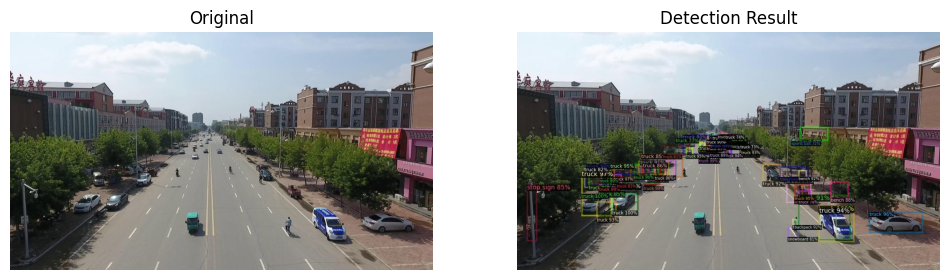

Running: ./selected_val/0000215_02932_d_0000263.jpg


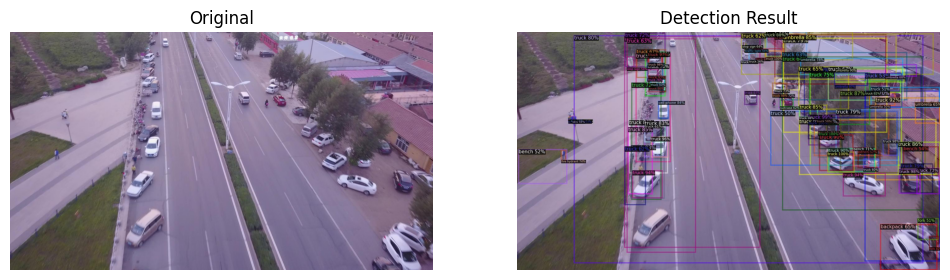

Running: ./selected_val/0000360_00589_d_0000716.jpg


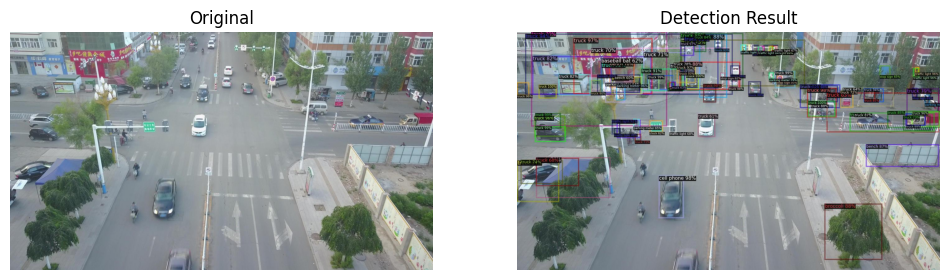

Running: ./selected_val/0000163_00359_d_0000001.jpg


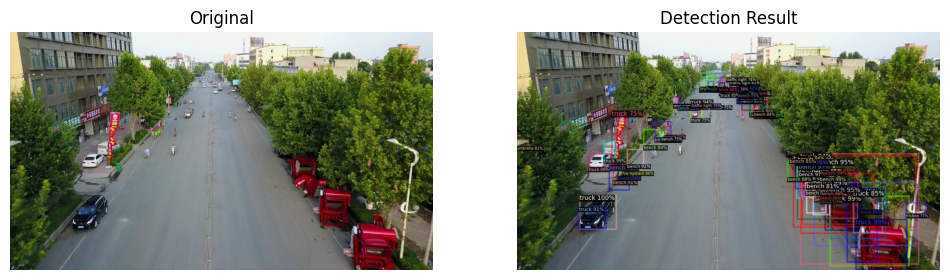

Running: ./selected_val/0000155_01201_d_0000001.jpg


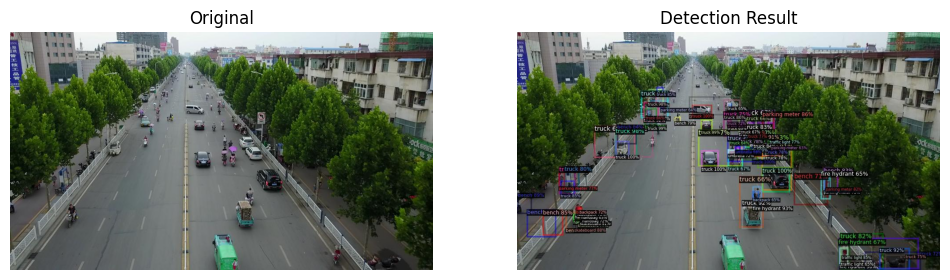

Running: ./selected_val/0000242_04600_d_0000014.jpg


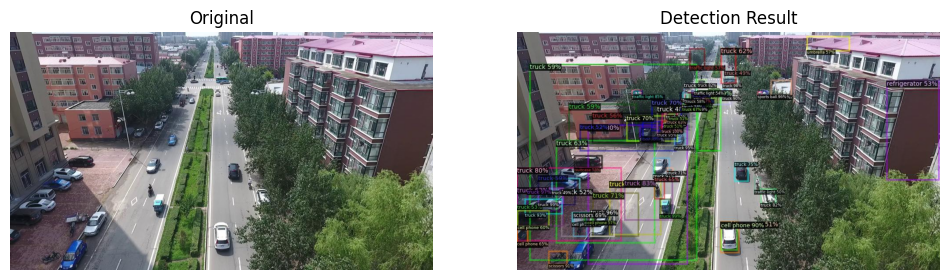

Running: ./selected_val/0000103_03738_d_0000032.jpg


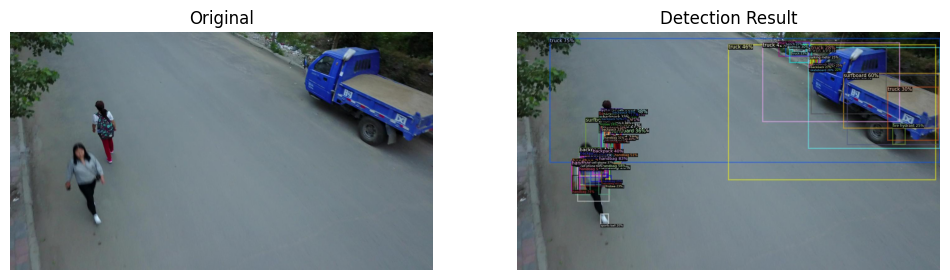

Running: ./selected_val/0000021_00500_d_0000002.jpg


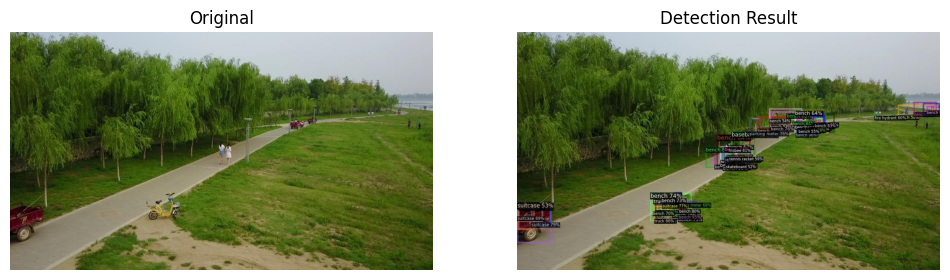

Running: ./selected_val/0000335_02353_d_0000055.jpg


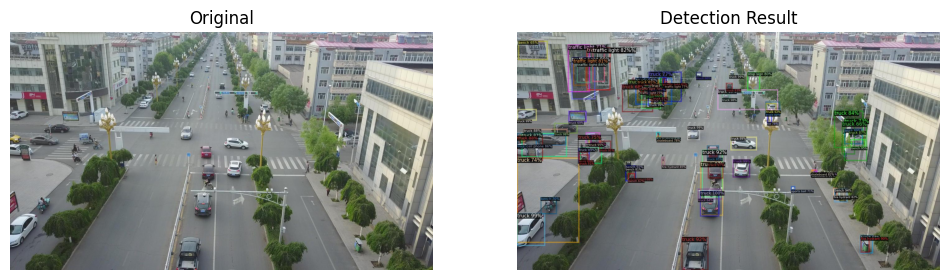

Running: ./selected_val/0000216_00520_d_0000001.jpg


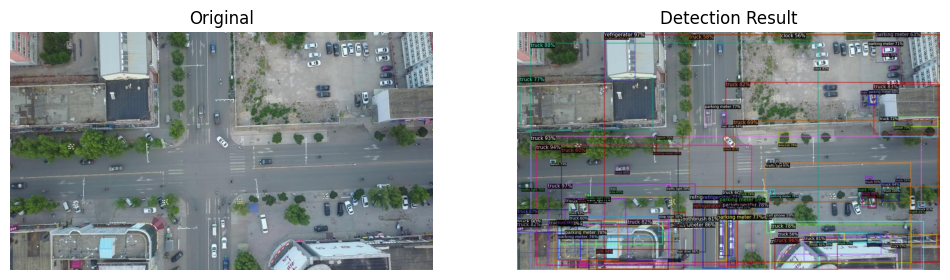

In [25]:
import os
import subprocess
import matplotlib.pyplot as plt
import cv2

# Thư mục chứa ảnh đã chọn
img_dir = "./selected_val"
output_dir = "./selected_results"
os.makedirs(output_dir, exist_ok=True)

# Liệt kê tất cả ảnh
img_files = [f for f in os.listdir(img_dir) if f.endswith(".jpg")]

for img in img_files:
    input_path = os.path.join(img_dir, img)
    output_path = os.path.join(output_dir, img)

    # Chạy lệnh detectron2 demo
    cmd = [
        "python", "-m", "demo.demo",
        "--config-file", "configs/custom_datasets/faster_rcnn_R_101_FPN_ft_all_fshot_coco_visdrone.yaml",
        "--input", input_path,
        "--output", output_path,
        "--custom-dataset", "configs/custom_datasets/coco_visdrone.yaml",
        "--opts", "MODEL.WEIGHTS",
        "models/fs/faster_rcnn_R_101_FPN_coco_visdrone/model_reset_combine.pth"
    ]

    print("Running:", input_path)
    subprocess.run(cmd)

    # Visualize kết quả
    img_in = cv2.imread(input_path)
    img_out = cv2.imread(output_path)

    # Chuyển BGR -> RGB cho matplotlib
    img_in = cv2.cvtColor(img_in, cv2.COLOR_BGR2RGB)
    img_out = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.title("Original")
    plt.imshow(img_in)
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.title("Detection Result")
    plt.imshow(img_out)
    plt.axis("off")

    plt.show()
